In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
data=pd.read_csv('HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
 data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


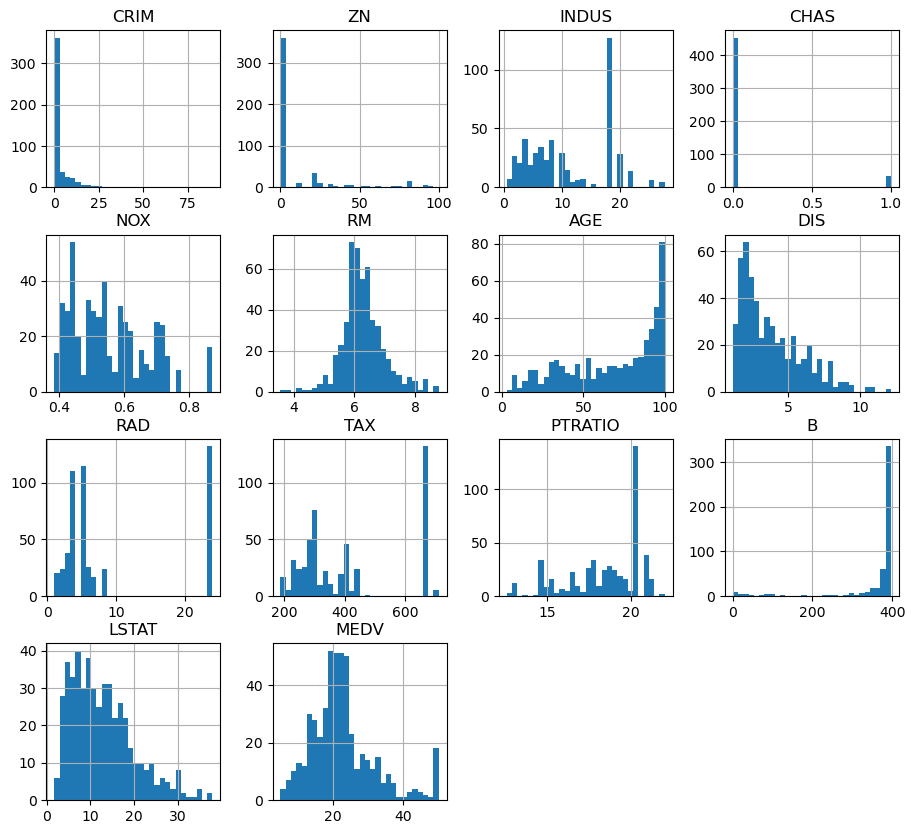

In [6]:
data.hist(bins=30,figsize=(11,10))
plt.show()

In [7]:
data.isnull().dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
null_rows_idx = data.isnull().any(axis=1)
data.loc[null_rows_idx].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9


In [9]:
median_data=data.median()
data.fillna(median_data,inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


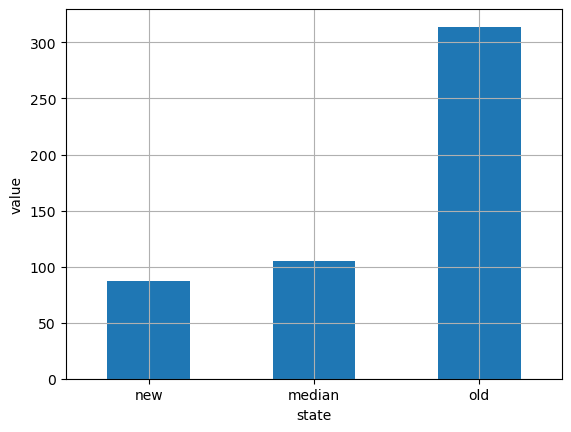

In [10]:
data['age_gap']=pd.cut(data['AGE'],bins=(0,35,65,100),labels=['new' , 'median','old' ])
data['age_gap'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('state')
plt.ylabel('value')
plt.show()

In [11]:
data=data.drop('B',axis=1)
#ستون Bحذف شده است و اجرای دوباره خطا میدهد 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    float64 
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  LSTAT    506 non-null    float64 
 12  MEDV     506 non-null    float64 
 13  age_gap  506 non-null    category
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


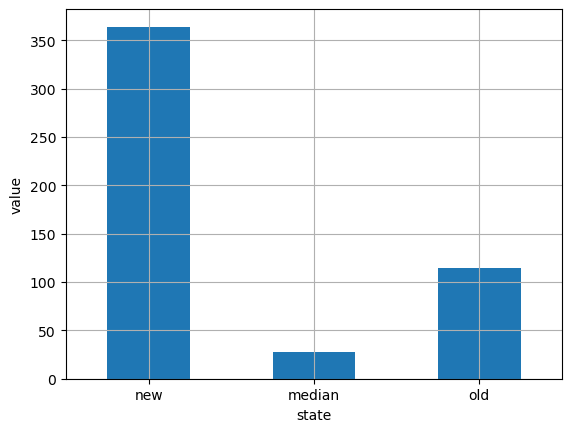

In [12]:
data['crime_level']=pd.cut(data['CRIM'],bins=[0.0, 2.0, 4.0 , data['CRIM'].max()],labels=['new' , 'median','old' ])
data['crime_level'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('state')
plt.ylabel('value')
plt.show()

In [13]:
data['res_ratio']=data['ZN']/(data['INDUS']+1)

In [14]:
data['large_house']=(data['RM']>data['RM'].median()).astype(int)

In [15]:
data['access']=data['DIS']/(data['RAD']+1)

In [16]:
data['Quality']=(1/data['TAX'])*(1/data['PTRATIO'])

In [17]:
data['LSTAT_log']=np.log1p(data['LSTAT'])

In [18]:
data['NOX_cat'] = pd.qcut(data['NOX'],q=3,labels=['low','medium','high'])

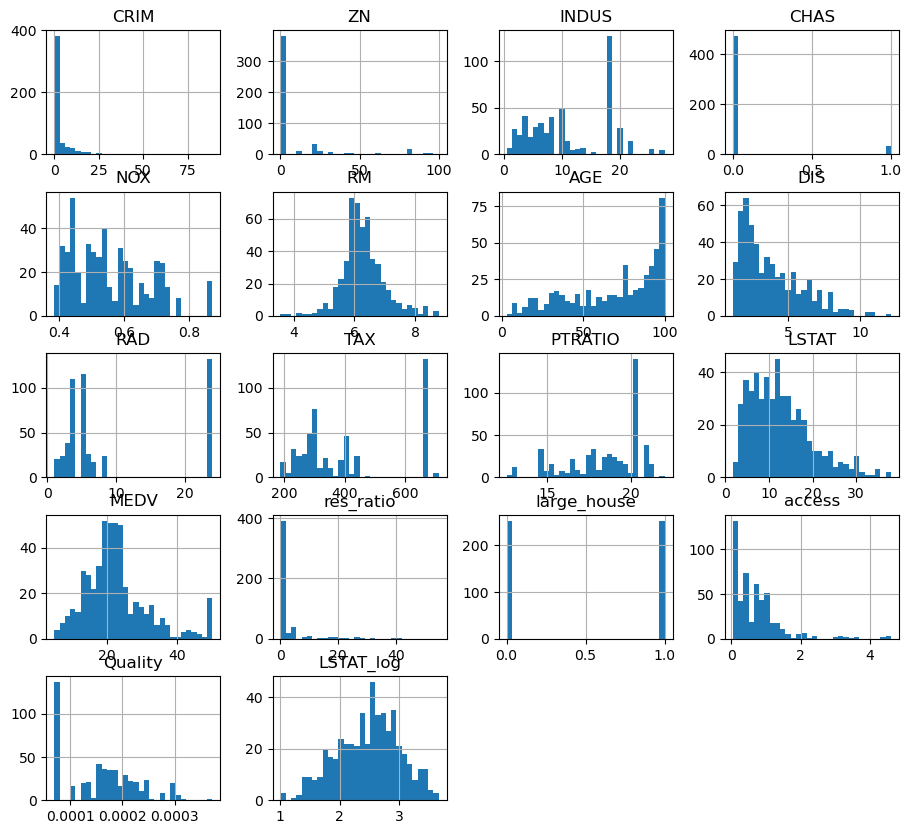

In [19]:
data.hist(bins=30,figsize=(11,10))
plt.show()

In [20]:
categorical_cols=data.select_dtypes(include='category').columns
categorical_cols

Index(['age_gap', 'crime_level', 'NOX_cat'], dtype='object')

In [21]:
#اجرای دوباره خطا میده
cat_encoder = OneHotEncoder(sparse_output=False,drop='first')

x_encoded=cat_encoder.fit_transform(data[categorical_cols])

x_encoded=pd.DataFrame(x_encoded,columns=cat_encoder.get_feature_names_out(categorical_cols))

data=pd.concat([data.drop(columns=categorical_cols),x_encoded],axis=1)

In [22]:
data=data.drop('age_gap_old',axis=1)
data=data.drop('crime_level_old',axis=1)

In [23]:
data['NOX_cat']=data['NOX_cat_medium'].combine_first(data['NOX_cat_low'])
data=data.drop(columns=['NOX_cat_low','NOX_cat_medium'])

In [24]:
data.isna().sum()

CRIM               0
ZN                 0
INDUS              0
CHAS               0
NOX                0
RM                 0
AGE                0
DIS                0
RAD                0
TAX                0
PTRATIO            0
LSTAT              0
MEDV               0
res_ratio          0
large_house        0
access             0
Quality            0
LSTAT_log          0
age_gap_new        0
crime_level_new    0
NOX_cat            0
dtype: int64

In [25]:
#train_set['age_gap_new']=train_set['age_gap_new'].fillna(train_set['age_gap_new'].mode()[0])
#train_set['crime_level_new']=train_set['crime_level_new'].fillna(train_set['crime_level_new'].mode()[0])
#train_set['NOX_cat']=train_set['NOX_cat'].fillna(train_set['NOX_cat'].mode()[0])
#median=train_set.median()
#train_set.fillna(median,inplace=True)

In [26]:
#train_set.isna().sum()

In [27]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,MEDV,res_ratio,large_house,access,Quality,LSTAT_log,age_gap_new,crime_level_new,NOX_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,...,4.98,24.0,5.438066,1,2.04500,0.000221,1.788421,0.0,1.0,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,...,9.14,21.6,0.000000,1,1.65570,0.000232,2.316488,0.0,1.0,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,...,4.03,34.7,0.000000,1,1.65570,0.000232,1.615420,0.0,1.0,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,...,2.94,33.4,0.000000,1,1.51555,0.000241,1.371181,0.0,1.0,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,...,11.43,36.2,0.000000,1,1.51555,0.000241,2.520113,0.0,1.0,0.0


In [28]:
x=data.drop('MEDV',axis=1)
y= data['MEDV']

x_train , x_test , y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [29]:
scaler=StandardScaler()

scaler.fit(x_train)

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)



In [30]:
scaler.fit(x_train)

StandardScaler()

In [31]:
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)

LinearRegression()

In [32]:
lin_perg=lin_reg.predict(x_test_scaled)
lin_perg=lin_perg.ravel()

lin_mse=mean_squared_error(y_test,lin_perg)
lin_rmse=lin_mse**0.5
print("Linear Regression RMSE",lin_rmse)

Linear Regression RMSE 4.617953056856682


In [33]:
r2=lin_reg.score(x_test_scaled,y_test)
print('R2:',r2)

R2: 0.7091996414706985


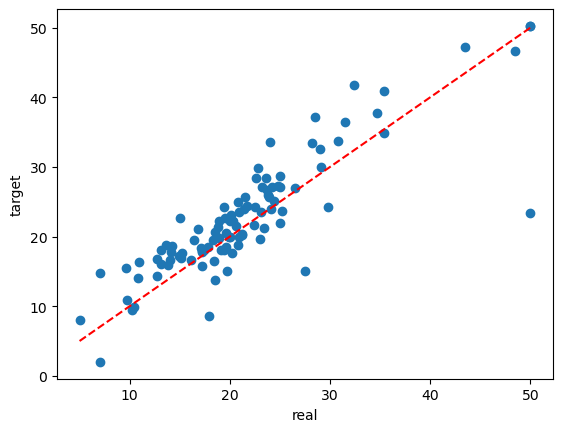

In [34]:
plt.scatter(y_test,lin_perg)
plt.xlabel("real")
plt.ylabel("target")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.show()

In [35]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [36]:
rf_pred=rf.predict(x_test_scaled)

rf_rmse=mean_squared_error(y_test,rf_pred)
print("Random Forest RMSE:",rf_rmse)

Random Forest RMSE: 12.361681578431384


In [37]:
for col,coef in zip(x.columns,lin_reg.coef_):
    print(col,coef)

CRIM -1.341151570558679
ZN -0.6142297078534014
INDUS -0.6829704722449981
CHAS 0.7579960824736631
NOX -1.8157969808123418
RM 3.040476043915359
AGE 0.4017273497945063
DIS -2.253384337674718
RAD 0.5028710678178685
TAX 1.9437249711895472
PTRATIO -0.860702727455401
LSTAT 2.798451481377378
res_ratio 0.5614167895518853
large_house -1.2300674432666148
access -0.37772010561525715
Quality 2.697286284381975
LSTAT_log -7.616122553262596
age_gap_new 0.20612322104938874
crime_level_new 0.023998890072601867
NOX_cat -0.2547868358815769


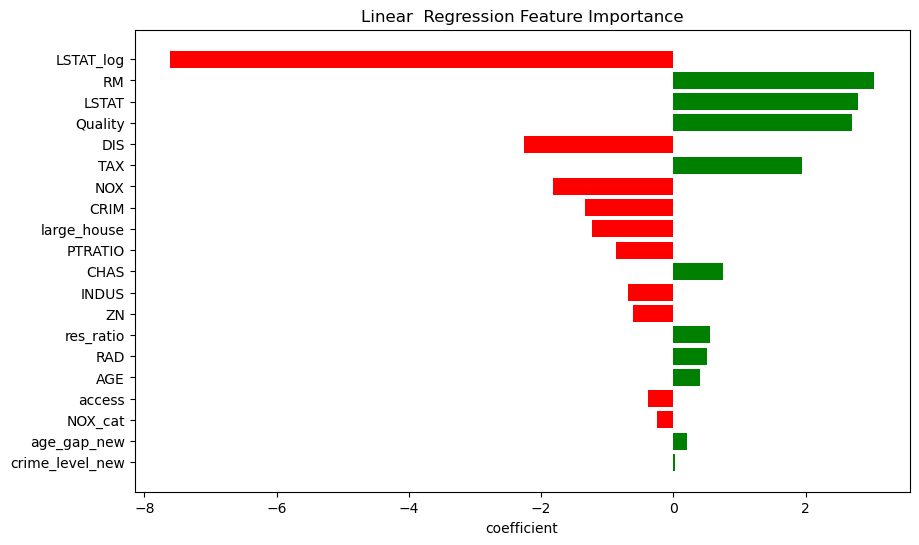

In [38]:
coef_df=pd.DataFrame({
    "feature":x.columns,
    "coefficient":lin_reg.coef_})

coef_df["abs_coef"]=coef_df["coefficient"].abs()
coef_df=coef_df.sort_values(by="abs_coef",ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df["feature"],coef_df["coefficient"],color=["green" if x>0 else "red" for x in coef_df["coefficient"]])

plt.xlabel("coefficient")
plt.title("Linear  Regression Feature Importance")
plt.gca().invert_yaxis()

plt.show()

In [41]:
new_data=x.iloc[[50]]

new_scaled=scaler.transform(new_data)

prediction_price=lin_reg.predict(new_scaled)

print("prediction_price",prediction_price)

prediction_price [20.3471313]


In [40]:
joblib.dump(lin_reg,"linear_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']